In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import glob
import os

In [2]:
# pth = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1"
# pth = "./models/tensorboard/visnav_lateral/behavior_pred_exp/classification/ablations_1"
pth = "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1"
# get all csvs
files = glob.glob(os.path.join(pth, "**/behavior_pred.csv"), recursive=True)
print(files)

["./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/behavior_before_stim_RESUMETrue_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']_finetuning_behavior_0.1/sparse_f:None_id:None/w:0.05_wp:0.25/behavior_pred.csv", "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_1.0g/behavior_before_stim_RESUMEFalse_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_behavior_predict_no_pretraining_1.0/sparse_f:None_id:None/w:0.05_wp:0.25/behavior_pred.csv", "./models/tensorboard/visnav_medial/behavior_pred_exp/classification/ablations_1/finetuning_0.1g/behavior_before_stim_RESUMETrue_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']/_full_finetuning_2_0.1_full_finetun

In [9]:
from scipy.stats import pearsonr
corrs = dict()
preds = dict()
for f in files:
    behavior_preds = pd.read_csv(f)
    r, p = pearsonr(behavior_preds['behavior'], behavior_preds['true'])
    print(f.split('/')[7])
    print(f"r: {r}, p: {p}")
    behavior_results = pd.DataFrame(columns=['r', 'p'])
    parent_dir = pathlib.Path(f).parent
    behavior_results.to_csv(os.path.join(parent_dir, 'corrs.csv'), index=False)
    corrs[f.split('/')[7]] = r
    preds[f.split('/')[7]] = behavior_preds['behavior'].values

corrs["finetuning_1.0_resumeTrue"] = 0.95
# Add legend inside the plot
rename_mapping = {
    "finetuning_0.01_resumeFalse": "No Pretraining, 1%",
    "finetuning_0.01_resumeTrue": "Finetune, 1%",
    "finetuning_0.1_resumeFalse": "No Pretraining, 10%",
    "finetuning_0.1_resumeTrue": "Finetune, 10%",
    "finetuning_1.0_resumeTrue": "Full Training",
    
}
corrs = {rename_mapping[k]: v for k, v in corrs.items() if k in rename_mapping.keys()}
order = rename_mapping.values()
# reorder according to order
corrs = {k: abs(corrs[k]) for k in order if k in corrs.keys()}
preds = {k: preds[k] for k in order if k in preds.keys()}

behavior_before_stim_RESUMETrue_paststateTrue_method_behavior_True_['speed']_predictbehaviorTrue_roundedFalsevisualTrue_contrastiveFalse_['id', 'frames', 'behavior_mean']_finetuning_behavior_0.1
r: 0.8259978083222611, p: 0.0
finetuning_1.0g
r: 0.9543719127634008, p: 0.0
finetuning_0.1g
r: 0.05705852256284126, p: 4.329229850956206e-06
finetuning_0.01g
r: 0.14562249732688104, p: 4.934451721296768e-32
finetuning_0.1_resumeNone
r: 0.8791206794103312, p: 0.0
finetuning_0.1_resumeNone
r: 0.029831654711716997, p: 0.016354051645388695
finetuning_0.05_resumeFalse
r: 0.8262765271272164, p: 0.0
finetuning_0.2_resumeTrue
r: 0.8996133720595592, p: 0.0
finetuning_0.2_resumeFalse
r: 0.9121698637996984, p: 0.0
finetuning_0.1_resumeTrue
r: 0.866703293734106, p: 0.0


In [20]:
exp_mlp = "./results/behavior"
exp_mlp_files = glob.glob(os.path.join(exp_mlp, "**/**.csv"), recursive=True)

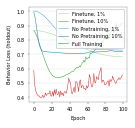

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import seaborn as sns
from neuroformer.visualize import nature_style
# nature_style()
set_research_params()

y_keys = ["Loss/test_behavior"]
y_key_labels = ["Behavior Loss"]
n_epochs = 100

# fig.suptitle("Eye pos vs. None, Lateral DS")
# fig.text(0.5, 0.04, "Epoch", ha="center", va="center")
# fig.text(0.06, 0.5, "Neural Decoding Loss", ha="center", va="center", rotation=90)

color_dict = {
    "No Pretraining, 1%": '#4ca3dd',
    "Finetune, 1%": '#98df8a',
    "No Pretraining, 10%": '#1f77b4',
    "Finetune, 10%": '#2ca02c',
    "Full Training": '#d62728',
}



plt.figure(figsize=(1.75, 1.75))
for n_file, log_file in enumerate(folders):
        key = log_file.split("/")[7]
        key_title = rename_mapping[key]
        for idx, y_key in enumerate(y_keys):
            event_accumulator = EventAccumulator(log_file)
            # print(event_accumulator.Tags())
            event_accumulator.Reload()
            tags = event_accumulator.Tags()['scalars']
            if y_key in tags:
                values = event_accumulator.Scalars(y_key)
                steps = [v.step for v in values][:n_epochs]
                values = [v.value for v in values][:n_epochs]
                data = pd.DataFrame({"steps": steps, key_title: values})
                # sns.lineplot(data=data, x="steps", y=key_title, ax=axs[idx//2, idx%2], label=key_title, color=color_dict[key_title])
                plt.plot(steps, values, label=key_title, color=color_dict[key_title])

plt.legend()
plt.grid(zorder=0, axis='y', linewidth=0.2)
plt.xlabel("Epoch")
plt.ylabel("Behavior Loss (holdout)")

plt.savefig(os.path.join(save_path, f"losses.pdf"), bbox_inches='tight')
plt.savefig(os.path.join(save_path, f"losses.png"), bbox_inches='tight')


# ax.get_legend().remove()
# make background non-transparent
# fig.patch.set_alpha(1)
# plt.tight_layout()

# save_path = "./models/tensorboard/visnav/behavior_pred_exp/plots"
plt.savefig(os.path.join(save_path, "losses.png"), dpi=300)
plt.savefig(os.path.join(save_path, "losses.pdf"), dpi=300)